In [1]:
import numpy as np
import pandas as pd
import math
import base64
import sys
import matplotlib.pyplot as plt

In [2]:
# IMPORT DATA: nrows limited to 10,000 to save memory; remove argument to load full datasets
data = pd.read_csv("vaers_data/2021VAERSDATA.csv", low_memory =False)
sym = pd.read_csv("vaers_data/2021VAERSSYMPTOMS.csv", low_memory =False)
vax = pd.read_csv("vaers_data/2021VAERSVAX.csv", low_memory =False)


In [3]:
# PRELIMINARY CLEANING: dropping unnecessary columns and rows with incomplete values.
# PRELIMINARY CLEANING: vaersdata
data_drop = ["CAGE_YR", 
             "CAGE_MO", 
             "RPT_DATE", 
             "SYMPTOM_TEXT", 
             "DATEDIED", 
             "L_THREAT", 
             "ER_VISIT", 
             "HOSPITAL", 
             "HOSPDAYS", 
             "X_STAY", 
             "DISABLE", 
             "NUMDAYS", 
             "OTHER_MEDS", 
             "CUR_ILL", 
             "HISTORY", 
             "PRIOR_VAX", 
             "SPLTTYPE", 
             "TODAYS_DATE", 
             "BIRTH_DEFECT", 
             "ER_ED_VISIT", 
             "ALLERGIES", 
             "LAB_DATA", 
             "V_ADMINBY", 
             "V_FUNDBY",
             "FORM_VERS", 
             "OFC_VISIT", 
             "DIED", 
             "RECOVD"]
data = data.drop(data_drop, axis = 1)


In [4]:
data

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,VAX_DATE,ONSET_DATE
0,916600,01/01/2021,TX,33.0,F,12/28/2020,12/30/2020
1,916601,01/01/2021,CA,73.0,F,12/31/2020,12/31/2020
2,916602,01/01/2021,WA,23.0,F,12/31/2020,12/31/2020
3,916603,01/01/2021,WA,58.0,F,12/23/2020,12/23/2020
4,916604,01/01/2021,TX,47.0,F,12/22/2020,12/29/2020
...,...,...,...,...,...,...,...
748225,1997121,12/31/2021,OH,69.0,M,02/26/2021,03/04/2021
748226,1997122,12/31/2021,NV,50.0,M,09/04/2021,10/01/2021
748227,1998663,12/31/2021,TN,83.0,F,03/25/2021,04/01/2021
748228,1998668,12/31/2021,SC,NaN,F,NaN,NaN


In [5]:
# remove rows with blank input
data = data.replace(r'^\s*$', np.nan, regex = True)
data.dropna()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,VAX_DATE,ONSET_DATE
0,916600,01/01/2021,TX,33.0,F,12/28/2020,12/30/2020
1,916601,01/01/2021,CA,73.0,F,12/31/2020,12/31/2020
2,916602,01/01/2021,WA,23.0,F,12/31/2020,12/31/2020
3,916603,01/01/2021,WA,58.0,F,12/23/2020,12/23/2020
4,916604,01/01/2021,TX,47.0,F,12/22/2020,12/29/2020
...,...,...,...,...,...,...,...
748224,1997120,12/31/2021,ID,56.0,M,11/28/2021,11/30/2021
748225,1997121,12/31/2021,OH,69.0,M,02/26/2021,03/04/2021
748226,1997122,12/31/2021,NV,50.0,M,09/04/2021,10/01/2021
748227,1998663,12/31/2021,TN,83.0,F,03/25/2021,04/01/2021


In [85]:
# remove rows with incomplete SEX values
data = data[(data["SEX"] != "U")]

In [7]:
# data

In [8]:
# PRELIMINARY CLEANING: vaerssymptoms
sym_drop = ["SYMPTOMVERSION1", 
            "SYMPTOMVERSION2", 
            "SYMPTOMVERSION3", 
            "SYMPTOMVERSION4", 
            "SYMPTOMVERSION5"]
sym = sym.drop(sym_drop, axis = 1)


In [87]:
# sym

In [10]:
# PRELIMINARY CLEANING: vaersvax
vax_drop = ["VAX_ROUTE", 
            "VAX_SITE", 
            "VAX_LOT"]
vax = vax.drop(vax_drop, axis = 1)

In [89]:
# removing cols for unknown manufacturer

vax = vax[(vax["VAX_MANU"] != "UNKNOWN_MANUFACTURER")]

In [90]:
# remove rows reporting non-COVID-19 related symptoms and unknown dosage series
# NOTE:  VAX_DOSE_SERIES reflects patients with a number of administered doses above 3
vax = vax[(vax["VAX_TYPE"] == "COVID19") & 
          (vax["VAX_DOSE_SERIES"] != "UNK") & 
          (vax["VAX_DOSE_SERIES"] != "N/A")]


In [91]:
# MERGING DATAFRAMES: merged dataframes assigned to variable "vaers"
vaers = pd.merge(vax, data)
vaers = pd.merge(vaers, sym)

# STATE FILTERING: New York, California, Florida, and Illinois 
vaers_filtered = vaers[(vaers["STATE"].isin(["CA", "FL", "NY", "IL"]))]

In [92]:
pd.set_option("display.min_rows", 200)

In [93]:
pd.set_option("display.max_rows", 200)

In [94]:
vaers_filtered.shape

(204814, 16)

In [95]:
vaers_filtered

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_NAME,RECVDATE,STATE,AGE_YRS,SEX,VAX_DATE,ONSET_DATE,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
1,916601,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,73.0,F,12/31/2020,12/31/2020,Anxiety,Dyspnoea,NaN,NaN,NaN
13,916612,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,71.0,F,12/30/2020,12/30/2020,Ear pain,Hypoaesthesia,NaN,NaN,NaN
14,916613,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,40.0,F,12/30/2020,12/30/2020,Abdominal pain upper,Dizziness,Dysgeusia,NaN,NaN
15,916614,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,NY,29.0,F,12/22/2020,12/22/2020,Blood pressure increased,Chest discomfort,Heart rate increased,NaN,NaN
16,916615,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,NY,38.0,F,12/23/2020,12/31/2020,Injection site erythema,Injection site pruritus,Injection site swelling,Lymph node pain,Lymphadenopathy
17,916617,COVID19,PFIZER\BIONTECH,1,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,CA,35.0,F,12/30/2020,12/30/2020,Chills,Dizziness,Injection site pain,Myalgia,Pyrexia
19,916619,COVID19,PFIZER\BIONTECH,1,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,NY,28.0,M,12/22/2020,12/25/2020,Injection site pain,Menorrhagia,NaN,NaN,NaN
22,916621,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,25.0,F,12/30/2020,12/30/2020,Chills,Fatigue,Headache,Myalgia,NaN
23,916622,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,NY,22.0,F,12/30/2020,12/31/2020,Headache,Heart rate increased,Injection site erythema,Injection site pain,Injection site swelling
24,916622,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,NY,22.0,F,12/30/2020,12/31/2020,Nausea,NaN,NaN,NaN,NaN


In [96]:
vaers_filtered["VAX_MANU"].unique()

array(['MODERNA', 'PFIZER\\BIONTECH', 'UNKNOWN MANUFACTURER', 'JANSSEN'],
      dtype=object)

In [97]:
vaers_filtered.loc[vaers_filtered["VAX_MANU"].isin(["UNKNOWN MANUFACTURER"])]

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_NAME,RECVDATE,STATE,AGE_YRS,SEX,VAX_DATE,ONSET_DATE,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
1127,917674,COVID19,UNKNOWN MANUFACTURER,1,COVID19 (COVID19 (UNKNOWN)),01/03/2021,FL,68.0,F,12/29/2020,12/29/2020,Headache,Nausea,Pain,Pyrexia,Vomiting
2476,919103,COVID19,UNKNOWN MANUFACTURER,1,COVID19 (COVID19 (UNKNOWN)),01/04/2021,NY,34.0,F,12/24/2020,12/31/2020,Chills,Fatigue,Headache,Hyperhidrosis,Nausea
6026,922873,COVID19,UNKNOWN MANUFACTURER,1,COVID19 (COVID19 (UNKNOWN)),01/06/2021,CA,47.0,F,01/05/2021,01/05/2021,Arthralgia,Blood pressure increased,Chest discomfort,Chills,Electrocardiogram
6027,922873,COVID19,UNKNOWN MANUFACTURER,1,COVID19 (COVID19 (UNKNOWN)),01/06/2021,CA,47.0,F,01/05/2021,01/05/2021,Fatigue,Headache,Paraesthesia,Pyrexia,Swelling face
12398,929389,COVID19,UNKNOWN MANUFACTURER,1,COVID19 (COVID19 (UNKNOWN)),01/08/2021,NY,55.0,F,12/24/2020,12/25/2020,Injection site induration,Injection site pain,Injection site pruritus,Injection site swelling,Injection site warmth
12399,929389,COVID19,UNKNOWN MANUFACTURER,1,COVID19 (COVID19 (UNKNOWN)),01/08/2021,NY,55.0,F,12/24/2020,12/25/2020,Visual impairment,NaN,NaN,NaN,NaN
18695,935413,COVID19,UNKNOWN MANUFACTURER,2,COVID19 (COVID19 (UNKNOWN)),01/11/2021,IL,45.0,F,01/08/2021,01/09/2021,Chills,Headache,Pyrexia,NaN,NaN
20508,937236,COVID19,UNKNOWN MANUFACTURER,1,COVID19 (COVID19 (UNKNOWN)),01/12/2021,NY,NaN,F,01/08/2021,01/09/2021,Chills,Fatigue,Headache,Nausea,NaN
22351,939020,COVID19,UNKNOWN MANUFACTURER,1,COVID19 (COVID19 (UNKNOWN)),01/12/2021,FL,75.0,F,12/30/2020,01/01/2021,Oral mucosal eruption,Rash,Rash erythematous,NaN,NaN
22373,939041,COVID19,UNKNOWN MANUFACTURER,1,COVID19 (COVID19 (UNKNOWN)),01/12/2021,CA,52.0,F,01/11/2021,01/11/2021,Chills,Diarrhoea,Fatigue,Influenza like illness,Pain


In [98]:
pd.set_option("display.min_rows", 100)

In [99]:
# viewing all values in symptom columns

vaers_filtered.groupby("SYMPTOM1").size().sort_values(ascending=False).to_frame()

,0
SYMPTOM1,
Chills,9875
Arthralgia,7999
Dizziness,7860
Fatigue,5315
Headache,4906
Asthenia,4680
Pyrexia,4048
Injection site erythema,3569
Pain in extremity,3309


In [100]:
# symptom_count

### Determining Which Symptoms are Reported Most Frequently

In [101]:
# slicing out only the symptom cols
# symp_m = moderna[["SYMPTOM1", "SYMPTOM2", "SYMPTOM3", "SYMPTOM4", "SYMPTOM5"]]

In [102]:
# symp_m = symp_m.groupby("SYMPTOM1").size()

In [103]:
# melts symptom cols down
# melt_m = symp_m.melt(var_name="columns", value_name="index")

In [104]:
# melt_m

In [105]:
# use the previously melted df as the parameters for .crosstab(), this makes it so that counts are easily seen for each numberd symptom

# cross_m = pd.crosstab(index=melt_m["index"], columns=melt_m["columns"])

In [106]:
# cross_m

In [107]:
# moderna_counts = symp_m.apply(pd.value_counts).fillna(0).astype(int)

In [108]:
# moderna_counts.sort_values(by="SYMPTOM1", ascending=False)

In [109]:
# moderna_symp = moderna_counts[moderna_counts["SYMPTOM1"] > 30]

In [110]:
# moderna_symp.sort_values(by="SYMPTOM1", ascending=False)

In [111]:
# moderna_symp = moderna_symp.replace(symptom_dict, regex=True)

In [112]:
# symp_m = symp_m.replace(symptom_dict, regex=True)


In [113]:
# moderna_symp.sort_values(by="SYMPTOM1", ascending=False)

In [114]:
# drop_val =["Product administered to patient of inappropriate age", "Inappropriate schedule of product administration", ]

In [115]:
# symp = vaers_filtered[cols]

In [116]:
# symp = symp.apply(pd.value_counts).fillna(0).astype(int)

In [117]:
# symp = symp[symp[cols] > 30]

In [118]:
# symp.sort_values(by="SYMPTOM1", ascending=False)

In [119]:
symptom_dict = {"Arthralgia" : "Joint Pain",
                "Joint swelling" : "Joint Pain",
                "Joint range of motion decreased" : "Joint Pain",
                "Joint stiffness" : "Joint Pain",
                "Asthenia" : "Fatigue",
                "Lethargy" : "Fatigue",
                "Somnolence" : "Fatigue",
                "Hypokinesia" : "Fatigue",
                "Hypersomnia" : "Fatigue",
                "Pyrexia" : "Fever",
                "Body temperature increased" : "Fever",
                "Feeling hot" : "Fever",
                "Body temperature" : "Fever",
                "Hot flush" : "Fever",
                "Skin warm" : "Fever", 
                "Feeling of body temperature change" : "Fever",
                "Hyperhidrosis" : "Fever",
                "Myalgia" : "Muscle Aches",
                "Pain" :"Muscle Aches",
                "Chest discomfort" : "Chest Pain",
                "Musculoskeletal chest pain" : "Chest Pain",
                "Chest pain" : "Chest Pain",
                "Tenderness" : "Muscle Aches",
                "Muscle tightness" : "Muscle Aches",
                "Musculoskeletal stiffness" : "Muscle Aches",
                "Musculoskeletal discomfort" : "Muscle Aches",
                "Injected limb mobility decreased" : "Muscle Aches",
                "Limb discomfort" : "Muscle Aches",
                "Pain in jaw" : "Muscle Aches",
                "Back pain" : "Muscle Aches",
                "Neck pain" : "Muscle Aches",
                "Erythema" : "Skin Discomfort",
                "Pruritus" : "Skin Discomfort",
                "Urticaria" : "Skin Discomfort",
                "Paraesthesia" : "Loss of Feeling in Extremity",
                "Rash erythematous" : "Rash",
                "Feeling abnormal" : "Malaise",
                "Injection site erythema" : "Discomfort at Injection Site",
                "Injection site pain" : "Discomfort at Injection Site",
                "Injection site pruritus" : "Discomfort at Injection Site",
                "Vaccination site pain" : "Discomfort at Injection Site",
                "Vaccination site erythema" : "Discomfort at Injection Site",
                "Injection site rash" : "Discomfort at Injection Site",
                "Injection site swelling" : "Discomfort at Injection Site",
                "Injection site warmth" : "Discomfort at Injection Site",
                "Injection site reaction" : "Discomfort at Injection Site",
                "Injection site induration" : "Discomfort at Injection Site",
                "Injection site bruising" : "Discomfort at Injection Site",
                "Vaccination site reaction" : "Discomfort at Injection Site",
                "Injection site discomfort" : "Discomfort at Injection Site",
                "Injection site inflammation" : "Discomfort at Injection Site",
                "Injection site discolouration" : "Discomfort at Injection Site",
                "Injection site urticaria" : "Discomfort at Injection Site",
                "Migraine" : "Headache",
                "Head discomfort" : "Headache",
                "Hypoaesthesia" : "Loss of Feeling in Extremity",
                "Cold sweat" : "Chills",
                "Feeling cold" : "Chills",
                "Night sweats" : "Chills",
                "Peripheral coldness" : "Chills",
                "Body temperature decreased" : "Chills",
                "Ageusia" : "Loss of Smell and/or Taste",
                "Dysgeusia" : "Loss of Smell and/or Taste",
                "Parosmia" : "Loss of Smell and/or Taste",
                "Taste disorder" : "Loss of Smell and/or Taste",
                "Dyspnoea" : "Shortness of Breath", 
                "Lymphadenopathy" : "Swelling of Lymph Nodes",
                "Axillary pain" : "Swelling of Lymph Nodes",
                "Lymph node pain" : "Swelling of Lymph Nodes",
                "Muscular weakness" : "Muscle Aches",
                "Heavy menstrual bleeding" : "Menstrual Cycle Irregularity",
                "Dysmenorrhoea" : "Menstrual Cycle Irregularity",
                "Intermenstrual bleeding" : "Menstrual Cycle Irregularity",
                "Menstruation irregular" : "Menstrual Cycle Irregularity",
                "Menorrhagia" : "Menstrual Cycle Irregularity",
                "Oligomenorrhoea" : "Menstrual Cycle Irregularity",
                "Polymenorrhoea" : "Menstrual Cycle Irregularity",
                "Postmenopausal haemorrhage" : "Menstrual Cycle Irregularity",
                "Vaginal haemorrhage" : "Menstrual Cycle Irregularity",
                "Vertigo" : "Dizziness",
                "Dizziness postural" : "Dizziness",
                "Asthma" : "Shortness of Breath",
                "Atrial fibrillation" : "Heart Palpitations",
                "Palpitations" : "Heart Palpitations",
                "Heart rate increased" : "Heart Palpitations",
                "Cardiac flutter" : "Heart Palpitations",
                "Heart rate irregular" : "Heart Palpitations",
                "Myocarditis" : "Heart Palpitations",
                "Anxiety" : "Mental Side Effects", 
                "Confusional state" : "Mental Side Effects",
                "Insomnia" : "Mental Side Effects",
                "Sleep disorder" : "Mental Side Effects",
                "Depression" : "Mental Side Effects",
                "Hypoaesthesia oral" : "Loss of Facial Feeling",
                "Bell's palsy" : "Loss of Facial Feeling",
                "Amnesia" : "Mental Side Effects",
                "Neurological symptom" : "Mental Side Effects",
                "Delirium" : "Mental Side Effects",
                "Restlessness" : "Mental Side Effects",
                "Irritability" : "Mental Side Effects",
                "Anger" : "Mental Side Effects",
                "Fear" : "Mental Side Effects",
                "Throat tightness" : "Shortness of Breath",
                "Productive cough" : "Cough",
                "Hallucination" : "Mental Side Effects",
                "Mental status changes" : "Mental Side Effects",
                "Panic attack" : "Mental Side Effects",
                "Crying" : "Mental Side Effects",
                "Retching" : "Vomiting",
                "Memory impairment" : "Mental Side Effects",
                "Agitation" : "Mental Side Effects",
                "Nervousness" : "Mental Side Effects",
                "Abnormal dreams" : "Mental Side Effects",
                "Delusion" : "Mental Side Effects",
                "Angioedema" : "Discomfort at Injection Site", 
                "Injection site dryness" : "Discomfort at Injection Site",
                "Local reaction" : "Discomfort at Injection Site",
                "Laryngitis" : "Sore Throat", 
                "Throat irritation" : "Sore Throat",
                "Abdominal pain upper" : "Abdominal Pain",
                "Abdominal discomfort" : "Abdominal Pain",
                "Rhinorrhoea" : "Runny Nose",
                "Painful respiration" : "Shortness of Breath",
                "Respiratory distress" : "Shortness of Breath",
                "Neuralgia" : "Muscle Aches",
                "Discomfort" : "Muscle Aches",
                "Flank pain" : "Muscle Aches",
                "Disorientation" : "Mental Side Effects",
                "Tearfulness" : "Mental Side Effects",
                "Screaming" : "Mental Side Effects",
                "Heart rate" : "Heart Palpitations",
                "Bone pain" : "Joint Pain",
                "Bradykinesia" : "Fatigue",
                "Wheezing" : "Shortness of Breath",
                }


In [120]:
# drop =["Product administered to patient of inappropriate age", "Inappropriate schedule of product administration",
#        "Interchange of vaccine products", "Incorrect dose administered", "Extra dose administered", "Expired product administered",
#        "Computerised tomogram", "Product storage error", "Electrocardiogram", "Biopsy liver normal", "Mean cell haemoglobin concentration increased",
#        "Mean cell volume abnormal", "Biopsy gingival", "Mediastinal mass", "Medical device pain", "Medical device site haemorrhage",
#        "Medical device site pain", "Medical induction of coma", "Megakaryocytes normal", "Meibomian gland dysfunction", "Menarche",
#        "Meningeal disorder", "Meningioma benign", "Meningism", "Meningitis chemical", "Meniscus cyst", "Hyperacusis", "Body height",
#        "Lumbar puncture", "Haematocrit decreased", "Pharyngeal hypoaesthesia", "Blood sodium normal","Influenza virus test negative",
#        "Menopausal disorder", "Biopsy brain normal", "Chromaturia", "Mental fatigue", "C-reactive protein", "Red blood cell sedimentation rate increased",
#        "Device connection issue", "Autopsy", "Drug ineffective"]

       # Biopsy brain normal
# Meralgia paraesthetica
# Mesenteric abscess
# May-Thurner syndrome

# Mental fatigue
# Biopsy brain normal
# Meralgia paraesthetica
# Mesenteric abscess
# May-Thurner syndrome
# "Mastectomy"
# Biopsy placenta
# Mast cell degranulation test
# Biopsy pharynx
# Biopsy peripheral nerve abnormal
# Magnetic resonance imaging thoracic normal
# Magnetic resonance imaging whole body
# Magnetic resonance neurography
# Magnetic therapy
# "Malabsorption"
# Malaria antigen test
# Malignant ascites
# Malignant hypertension
# Malignant melanoma
# Malignant neoplasm progression
# Mammary duct ectasia
# Biopsy oesophagus normal
# Man-in-the-barrel syndrome
# Mandibular mass
# Manic symptom
# Manifest refraction
# Manual lymphatic drainage
# Manufacturing issue
# Marrow hyperplasia
# Mass excision
# "Massage"
# Injection site joint inflammation" ]

In [121]:
# vaers_drop = vaers_filtered[~vaers_filtered["SYMPTOM1"].isin(drop)]
# vaers_drop = vaers_drop[~vaers_drop["SYMPTOM2"].isin(drop)]
# vaers_drop = vaers_drop[~vaers_drop["SYMPTOM3"].isin(drop)]
# vaers_drop = vaers_drop[~vaers_drop["SYMPTOM4"].isin(drop)]
# vaers_drop = vaers_drop[~vaers_drop["SYMPTOM5"].isin(drop)]


In [122]:
clean = vaers_filtered.replace({"SYMPTOM1" : symptom_dict, "SYMPTOM2" : symptom_dict, 
                            "SYMPTOM3" : symptom_dict, "SYMPTOM4" : symptom_dict,
                            "SYMPTOM5" : symptom_dict})

In [123]:
clean

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_NAME,RECVDATE,STATE,AGE_YRS,SEX,VAX_DATE,ONSET_DATE,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
1,916601,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,73.0,F,12/31/2020,12/31/2020,Mental Side Effects,Shortness of Breath,NaN,NaN,NaN
13,916612,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,71.0,F,12/30/2020,12/30/2020,Ear pain,Loss of Feeling in Extremity,NaN,NaN,NaN
14,916613,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,40.0,F,12/30/2020,12/30/2020,Abdominal Pain,Dizziness,Loss of Smell and/or Taste,NaN,NaN
15,916614,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,NY,29.0,F,12/22/2020,12/22/2020,Blood pressure increased,Chest Pain,Heart Palpitations,NaN,NaN
16,916615,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,NY,38.0,F,12/23/2020,12/31/2020,Discomfort at Injection Site,Discomfort at Injection Site,Discomfort at Injection Site,Swelling of Lymph Nodes,Swelling of Lymph Nodes
17,916617,COVID19,PFIZER\BIONTECH,1,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,CA,35.0,F,12/30/2020,12/30/2020,Chills,Dizziness,Discomfort at Injection Site,Muscle Aches,Fever
19,916619,COVID19,PFIZER\BIONTECH,1,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,NY,28.0,M,12/22/2020,12/25/2020,Discomfort at Injection Site,Menstrual Cycle Irregularity,NaN,NaN,NaN
22,916621,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,25.0,F,12/30/2020,12/30/2020,Chills,Fatigue,Headache,Muscle Aches,NaN
23,916622,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,NY,22.0,F,12/30/2020,12/31/2020,Headache,Heart Palpitations,Discomfort at Injection Site,Discomfort at Injection Site,Discomfort at Injection Site
24,916622,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,NY,22.0,F,12/30/2020,12/31/2020,Nausea,NaN,NaN,NaN,NaN


In [124]:
# array output without truncation
np.set_printoptions(threshold=sys.maxsize)

In [125]:
cols = ["SYMPTOM1", "SYMPTOM2", "SYMPTOM3", "SYMPTOM4", "SYMPTOM5"]

In [126]:
clean[cols].nunique()

SYMPTOM1    4264
SYMPTOM2    3984
SYMPTOM3    3669
SYMPTOM4    3381
SYMPTOM5    3016
dtype: int64

In [127]:
# clean["SYMPTOM1"].unique()

In [218]:
clean

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_NAME,RECVDATE,STATE,AGE_YRS,SEX,VAX_DATE,ONSET_DATE,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
1,916601,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,73.0,F,12/31/2020,12/31/2020,Mental Side Effects,Shortness of Breath,NaN,NaN,NaN
13,916612,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,71.0,F,12/30/2020,12/30/2020,Ear pain,Loss of Feeling in Extremity,NaN,NaN,NaN
14,916613,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,40.0,F,12/30/2020,12/30/2020,Abdominal Pain,Dizziness,Loss of Smell and/or Taste,NaN,NaN
15,916614,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,NY,29.0,F,12/22/2020,12/22/2020,Blood pressure increased,Chest Pain,Heart Palpitations,NaN,NaN
16,916615,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,NY,38.0,F,12/23/2020,12/31/2020,Discomfort at Injection Site,Discomfort at Injection Site,Discomfort at Injection Site,Swelling of Lymph Nodes,Swelling of Lymph Nodes
17,916617,COVID19,PFIZER\BIONTECH,1,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,CA,35.0,F,12/30/2020,12/30/2020,Chills,Dizziness,Discomfort at Injection Site,Muscle Aches,Fever
19,916619,COVID19,PFIZER\BIONTECH,1,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,NY,28.0,M,12/22/2020,12/25/2020,Discomfort at Injection Site,Menstrual Cycle Irregularity,NaN,NaN,NaN
22,916621,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,25.0,F,12/30/2020,12/30/2020,Chills,Fatigue,Headache,Muscle Aches,NaN
23,916622,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,NY,22.0,F,12/30/2020,12/31/2020,Headache,Heart Palpitations,Discomfort at Injection Site,Discomfort at Injection Site,Discomfort at Injection Site
24,916622,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),01/01/2021,NY,22.0,F,12/30/2020,12/31/2020,Nausea,NaN,NaN,NaN,NaN


In [128]:
sym_count = clean[cols].apply(pd.value_counts).fillna(0).astype(int)

In [217]:
sym_count.sort_values(by="SYMPTOM1", ascending=False)

,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
Chills,10864,6429,2763,1309,713
Fatigue,10680,9011,6208,3866,2393
Discomfort at Injection Site,10373,9712,8320,6008,3705
Muscle Aches,8712,9257,8876,8020,6543
Joint Pain,8545,1474,558,333,204
Dizziness,8302,5342,3073,1719,979
Fever,8134,7772,7503,6912,5945
Skin Discomfort,6281,4557,3273,2268,1639
Headache,5450,7653,6892,4991,3020
Mental Side Effects,4347,2356,1914,1576,1346


In [129]:
total = sym_count.sort_values(by="SYMPTOM1", ascending=False)

In [130]:
# top symptoms for all vaccines combined 

total["total"] = total["SYMPTOM1"] + total["SYMPTOM2"] + total["SYMPTOM3"] + total["SYMPTOM4"] + total["SYMPTOM5"]

total["total"].sort_values(ascending=False).to_frame()


,total
Muscle Aches,41408
Discomfort at Injection Site,38118
Fever,36266
Fatigue,32158
Headache,28006
Chills,22078
Dizziness,19415
Skin Discomfort,18018
Pain in extremity,15394
Nausea,14785


**The top side effects include Muscle Aches, Discomfort at Injection Site, Fever, Fatigue, Headache, Chills, Dizziness**

In [131]:
sym1 = sym_count[sym_count["SYMPTOM1"] > 70].sort_values(by="SYMPTOM1", ascending=False)

In [132]:
sym2 = sym_count.sort_values(by="SYMPTOM2", ascending=False).head(10)


In [133]:
sym3 = sym_count.sort_values(by="SYMPTOM3", ascending=False).head(10)

In [134]:
sym4 = sym_count.sort_values(by="SYMPTOM4", ascending=False).head(10)

In [135]:
sym5 = sym_count.sort_values(by="SYMPTOM5", ascending=False).head(10)

In [136]:
symp_graph = clean.groupby(["SYMPTOM1", "VAX_MANU"]).size().reset_index(name="people")

In [137]:
symp_graph = symp_graph.sort_values(by="people", ascending=False)

### side effects per vax manu

In [151]:
# how many people recieved the moderna vax, for normalizing the data
len(moderna.index)

95917

In [231]:
moderna = clean.loc[vaers_filtered["VAX_MANU"].isin(["MODERNA"])]


moderna_ct = moderna[cols].apply(pd.value_counts).fillna(0).astype(int)

moderna_ct["Moderna"] = moderna_ct["SYMPTOM1"] + moderna_ct["SYMPTOM2"] + moderna_ct["SYMPTOM3"] + moderna_ct["SYMPTOM4"] + moderna_ct["SYMPTOM5"]

moderna_tot = moderna_ct["Moderna"].sort_values(ascending=False).to_frame()

m_sym = moderna_tot.head(30)

m_sym = m_sym.transpose()

In [232]:
# how many people recieved the pfizer vax, for normalizing the data
len(pfizer.index)

93744

In [228]:
pfizer = clean.loc[vaers_filtered["VAX_MANU"].isin(["PFIZER\BIONTECH"])]

pfizer_ct = pfizer[cols].apply(pd.value_counts).fillna(0).astype(int)

pfizer_ct["Pfizer"] = pfizer_ct["SYMPTOM1"] + pfizer_ct["SYMPTOM2"] + pfizer_ct["SYMPTOM3"] + pfizer_ct["SYMPTOM4"] + pfizer_ct["SYMPTOM5"]

pfizer_tot = pfizer_ct["Pfizer"].sort_values(ascending=False).to_frame()

p_sym = pfizer_tot.head(30)

p_sym = p_sym.transpose()


In [180]:
# how many people recieved the janssen vax, for normalizing the data
len(janssen.index)

14899

In [238]:
janssen = clean.loc[vaers_filtered["VAX_MANU"].isin(["JANSSEN"])]

janssen_ct = janssen[cols].apply(pd.value_counts).fillna(0).astype(int)
janssen_ct
janssen_ct["Janssen"] = janssen_ct["SYMPTOM1"] + janssen_ct["SYMPTOM2"] + janssen_ct["SYMPTOM3"] + janssen_ct["SYMPTOM4"] + janssen_ct["SYMPTOM5"]

janssen_tot = janssen_ct["Janssen"].sort_values(ascending=False).to_frame()

j_sym = janssen_tot.head(35)

j_sym = j_sym.transpose()


In [239]:
m_sym = m_sym[["Muscle Aches", "Discomfort at Injection Site", "Fever", "Fatigue", "Headache", "Chills", "Dizziness", "Mental Side Effects"]]

m_sym

,Muscle Aches,Discomfort at Injection Site,Fever,Fatigue,Headache,Chills,Dizziness,Mental Side Effects
Moderna,20589,29551,18263,15880,13269,11357,7617,4941


In [240]:
p_sym = p_sym[["Muscle Aches", "Discomfort at Injection Site", "Fever", "Fatigue", "Headache", "Chills", "Dizziness", "Mental Side Effects"]]

p_sym



,Muscle Aches,Discomfort at Injection Site,Fever,Fatigue,Headache,Chills,Dizziness,Mental Side Effects
Pfizer,17389,7472,14633,13781,11994,8553,9885,5500


In [241]:
j_sym = j_sym[["Muscle Aches", "Discomfort at Injection Site", "Fever", "Fatigue", "Headache", "Chills", "Dizziness", "Mental Side Effects"]]

j_sym



,Muscle Aches,Discomfort at Injection Site,Fever,Fatigue,Headache,Chills,Dizziness,Mental Side Effects
Janssen,3378,1072,3316,2456,2694,2142,1890,1089


Muscle Aches, Discomfort at Injection Site, Fever, Fatigue, Headache, Chills, Dizziness

In [242]:
# grouped bar graph
# group by vax manu and top 5 symptoms, size of each symptom per vax manu

In [243]:
allvax = pd.merge(pd.merge(m_sym, p_sym, on="Muscle Aches", how="outer"), j_sym, on="Muscle Aches", how="outer")

In [244]:
topsym = pd.concat([m_sym, p_sym, j_sym], axis=0, sort=False)

topsym = topsym.transpose()

In [245]:
topsym

,Moderna,Pfizer,Janssen
Muscle Aches,20589,17389,3378
Discomfort at Injection Site,29551,7472,1072
Fever,18263,14633,3316
Fatigue,15880,13781,2456
Headache,13269,11994,2694
Chills,11357,8553,2142
Dizziness,7617,9885,1890
Mental Side Effects,4941,5500,1089


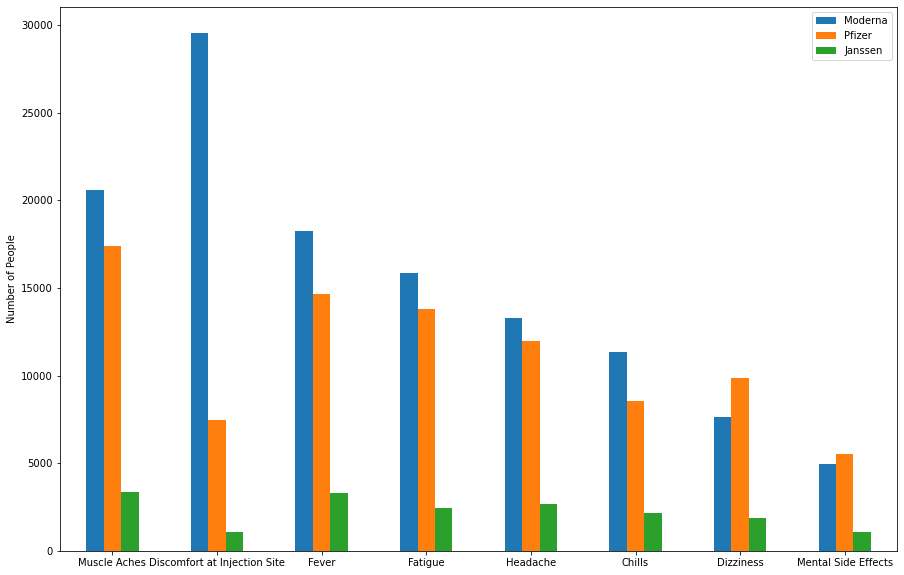

In [246]:
topsym.plot.bar(ylabel = "% of People", rot=0, figsize = (15,10));



In [247]:
# exporting clean vaers data and topsym dataframe to csv

clean.to_csv("clean_data/vaera_clean.csv", index=False)